<a href="https://colab.research.google.com/github/Agnik101/PRODIGY_ML_04/blob/main/CNN_hand_gesture2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Network

### Importing the libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
tf.__version__

'2.16.2'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('train_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 20000 images belonging to 10 classes.


### Preprocessing the Test set

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 20000 images belonging to 10 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [ ]:
cnn = tf.keras.models.Sequential()

### - adding 1st Convolution layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

C:\Users\agnik\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


###  - Pooling

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### adding 3 more layers with pooling

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### - Flattening

In [ ]:
cnn.add(tf.keras.layers.Flatten())

### - Full Connection

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### - Output Layer

In [ ]:
cnn.add(tf.keras.layers.Dense(units=10, activation='softmax'))

## Part 3 - Training the CNN

### Compiling the CNN

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [ ]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 30)

Epoch 1/30


C:\Users\agnik\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 350s 534ms/step - accuracy: 0.3484 - loss: 1.7814 - val_accuracy: 0.8834 - val_loss: 0.3609
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 278s 442ms/step - accuracy: 0.8927 - loss: 0.3147 - val_accuracy: 0.9735 - val_loss: 0.0827
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 283s 450ms/step - accuracy: 0.9518 - loss: 0.1467 - val_accuracy: 0.9868 - val_loss: 0.0415
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 266s 422ms/step - accuracy: 0.9670 - loss: 0.0926 - val_accuracy: 0.9869 - val_loss: 0.0313
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 380s 602ms/step - accuracy: 0.9747 - loss: 0.0708 - val_accuracy: 0.9863 - val_loss: 0.0318
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 286s 453ms/step - accuracy: 0.9741 - loss: 0.0655 - val_accuracy: 0.9897 - val_loss: 0.0221
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 288s 459ms/step - accuracy: 0.9791 - loss: 0.0580 - val_accuracy: 0.9878 - val_loss: 0.0307
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 285s 453ms/step - accuracy: 0.9751 - loss: 0.06

## Part 4 - Making a single prediction

## prediction1

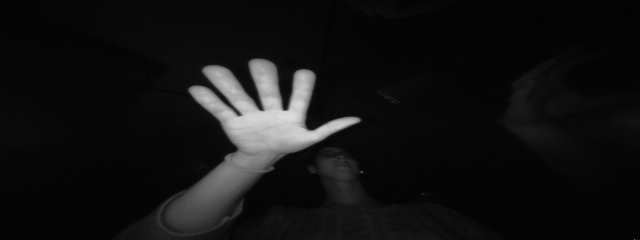

In [ ]:
#test image visualization
from IPython.display import Image
Image("frame_01_04_0006.png")
Image("img5.png")


In [ ]:
import numpy as np
from keras.preprocessing import image

class_labels = ['palm', 'I', 'fist','fist_moved','thumb','index','ok','palm_moved','c','down']
test_image = image.load_img('img5.png', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
predicted_class_index = np.argmax(result, axis=1)[0]


# Get the class name from the class labels
predicted_class_name = class_labels[predicted_class_index]

print(f'Predicted class: {predicted_class_name}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 662ms/step
Predicted class: down


## Prediction 2

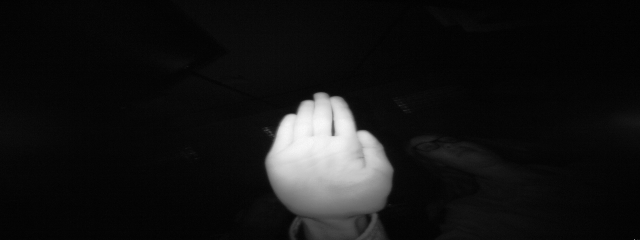

In [ ]:
#test image visualization
from IPython.display import Image
Image("img8.png")


In [ ]:
import numpy as np
from keras.preprocessing import image

class_labels = ['palm', 'I', 'fist','fist_moved','thumb','index','ok','palm_moved','c','down']
test_image = image.load_img('img8.png', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
predicted_class_index = np.argmax(result, axis=1)[0]


# Get the class name from the class labels
predicted_class_name = class_labels[predicted_class_index]

print(f'Predicted class: {predicted_class_name}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
Predicted class: palm
